# BoardBot Accuracy Test Analysis for LLM Router Architecture

## Introduction

This notebook analyzes the test results of the **BoardBot AI system** for the **Accuracy Test Dataset**, focusing on the **LLM Router** architecture.

**Goals:**

1. **Analyze characteristics and patterns in cases with low accuracy scores.**
2. **Identify correlations between accuracy and features like extracted filters, filter count, token usage, and response time.**
3. **Highlight potential improvement areas based on this analysis.**

By performing a detailed analysis of individual test cases and their characteristics, we aim to gain insights into the system's performance and identify opportunities for enhancement.

---

## Table of Contents

1. [Data Loading and Preprocessing](#1)
    - Import Libraries
    - Load Data
    - Parse Metadata and Extract Features
    - Preprocess Data
2. [Data Exploration](#2)
    - Distribution of Product Accuracy
    - Identify Low Accuracy Cases
3. [Analysis of Low Accuracy Cases](#3)
    - Compare Distributions Between Low and High Accuracy Cases
    - Correlation Analysis
4. [Analyzing the Impact of Filter Differences on Accuracy](#4)
    - Compute Filter Differences
    - Analyze Correlation Between Filter Differences and Accuracy
    - Visualize Filter Differences for Individual Cases
5. [Detailed Analysis of Low Accuracy Cases](#5)
    - Display Low Accuracy Cases
    - Analyze Patterns in Low Accuracy Cases
6. [Potential Areas for Improvement](#6)
7. [Conclusion](#7)
8. [Appendix: Additional Analysis](#8)

---

<a id="1"></a>

## 1. Data Loading and Preprocessing

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr

# Set plotting style
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = [12, 6]

### Load Data

In [2]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded {len(df)} test records.")
    return df

# Load the data
df = load_data("../data/test_results/accuracy_test_result.csv")

Loaded 105 test records.


**Sample Data Preview:**

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Message ID           105 non-null    object 
 1   Test Type            105 non-null    object 
 2   Model                105 non-null    object 
 3   Architecture         105 non-null    object 
 4   Timestamp            105 non-null    object 
 5   Product Accuracy     105 non-null    object 
 6   Product Consistency  105 non-null    object 
 7   Order Consistency    105 non-null    object 
 8   Session ID           105 non-null    object 
 9   Input                105 non-null    object 
 10  History Management   105 non-null    object 
 11  Response Type        105 non-null    object 
 12  Response             105 non-null    object 
 13  Products             105 non-null    object 
 14  Reasoning            104 non-null    object 
 15  Follow-up Question   105 non-null    obj

,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,History Management,Response Type,Response,Products,Reasoning,Follow-up Question,Metadata,Tags,Product Accuracy.1
0,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,accuracy,gpt-4o,llm-router,"11/4/2024, 1:32:50 AM",100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Give me available devices manufactured by Adva...,keep-last-5,clear_intent_product,It looks like you're interested in Advantech's...,"[{""productId"":""SOM-4466L-M0A1E"",""name"":""COM MO...",The user's query specifically asked for Advant...,Do you have a specific application in mind for...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%
1,b6f5faa6-bd8c-4ff0-bc95-c8463e856310_response,accuracy,gpt-4o,llm-router,"11/4/2024, 1:33:04 AM",100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,List Advantech-made products with ETX form-factor,keep-last-5,clear_intent_product,It looks like you're interested in Advantech p...,"[{""productId"":""SOM-4466L-M0A1E"",""name"":""COM MO...",The products listed are all manufactured by Ad...,Do you have any specific performance requireme...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%
2,87996682-540b-4414-934c-56d808df0f4a_response,accuracy,gpt-4o,llm-router,"11/4/2024, 1:33:16 AM",100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Show me ETX devices produced by Advantec,keep-last-5,clear_intent_product,Advantech offers a range of ETX form factor mo...,"[{""productId"":""SOM-4466L-M0A1E"",""name"":""COM MO...",The products listed are all manufactured by Ad...,Are there specific features or applications yo...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%
3,87117a07-51e5-4851-94fc-822ee2618050_response,accuracy,gpt-4o,llm-router,"11/4/2024, 1:33:26 AM",100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,What Advantech hardware comes in the ETX format?,keep-last-5,vague_intent_product,Advantech offers a range of ETX form-factor mo...,"[{""productId"":""SOM-4466L-M0A1E"",""name"":""COM MO...",These products were selected because they all ...,What specific application or industry are you ...,"{""classificationResult"":{""category"":""vague_int...",NaN,100.00%
4,fca92c03-e5c7-48ba-aa15-07b57b87ec94_response,accuracy,gpt-4o,llm-router,"11/4/2024, 1:33:38 AM",100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Find Advantech-manufactured items with Embedde...,keep-last-5,clear_intent_product,Advantech offers a variety of ETX form factor ...,"[{""productId"":""SOM-4466L-M0A1E"",""name"":""COM MO...",The products listed are all manufactured by Ad...,Are you looking for a specific processor type ...,"{""classificationResult"":{""category"":""clear_int...",NaN,100.00%


### Parse Metadata and Extract Features

Define functions to parse metadata and extract relevant features.

In [4]:
def parse_metadata(metadata_str):
    try:
        return json.loads(metadata_str)
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError: {e}")
        return {}
    except Exception as e:
        print(f"Error parsing metadata: {e}")
        return {}

def extract_token_usage(row):
    metadata = parse_metadata(row['Metadata'])
    input_tokens = metadata.get('inputTokenUsage', {})
    output_tokens = metadata.get('outputTokenUsage', {})
    return pd.Series({
        'input_tokens_total': sum(input_tokens.values()),
        'output_tokens_total': sum(output_tokens.values()),
        'input_tokens_classification': input_tokens.get('classification', 0),
        'input_tokens_queryProcessing': input_tokens.get('queryProcessing', 0),
        'input_tokens_generate': input_tokens.get('generate', 0),
        'output_tokens_classification': output_tokens.get('classification', 0),
        'output_tokens_queryProcessing': output_tokens.get('queryProcessing', 0),
        'output_tokens_generate': output_tokens.get('generate', 0),
    })

def extract_time_metrics(row):
    metadata = parse_metadata(row['Metadata'])
    time_taken = metadata.get('timeTaken', {})
    total_time = sum(time_taken.values())
    return pd.Series({
        'time_classification': time_taken.get('classification', 0),
        'time_queryProcessing': time_taken.get('queryProcessing', 0),
        'time_search': time_taken.get('search', 0),
        'time_generate': time_taken.get('generate', 0),
        'total_time': total_time
    })

def extract_filters(row):
    metadata = parse_metadata(row['Metadata'])
    filters = metadata.get('filters', {})
    num_filters = len(filters)
    return pd.Series({
        'filters': filters,
        'num_filters': num_filters
    })

def extract_category(row):
    metadata = parse_metadata(row['Metadata'])
    classification_result = metadata.get('classificationResult', {})
    category = classification_result.get('category', None)
    return category

def extract_classification_confidence(row):
    metadata = parse_metadata(row['Metadata'])
    classification_result = metadata.get('classificationResult', {})
    confidence = classification_result.get('confidence', None)
    return confidence

### Preprocess Data

Apply the extraction functions to the dataframe.

In [5]:
def preprocess_data(df):
    # Convert timestamp
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Extract token usage
    token_metrics = df.apply(extract_token_usage, axis=1)
    df = pd.concat([df, token_metrics], axis=1)

    # Extract time metrics
    time_metrics = df.apply(extract_time_metrics, axis=1)
    df = pd.concat([df, time_metrics], axis=1)

    # Extract filters
    filter_metrics = df.apply(extract_filters, axis=1)
    df = pd.concat([df, filter_metrics], axis=1)

    # Extract category and confidence
    df['category'] = df.apply(extract_category, axis=1)
    df['classification_confidence'] = df.apply(extract_classification_confidence, axis=1)

    # Convert accuracy to numeric
    df['Product_Accuracy'] = df['Product Accuracy'].str.rstrip('%').astype(float)

    return df

# Preprocess the data
df = preprocess_data(df)

**Preview Preprocessed Data:**

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message ID                     105 non-null    object        
 1   Test Type                      105 non-null    object        
 2   Model                          105 non-null    object        
 3   Architecture                   105 non-null    object        
 4   Timestamp                      105 non-null    datetime64[ns]
 5   Product Accuracy               105 non-null    object        
 6   Product Consistency            105 non-null    object        
 7   Order Consistency              105 non-null    object        
 8   Session ID                     105 non-null    object        
 9   Input                          105 non-null    object        
 10  History Management             105 non-null    object        
 11  Response Type      

,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,...,time_classification,time_queryProcessing,time_search,time_generate,total_time,filters,num_filters,category,classification_confidence,Product_Accuracy
0,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,accuracy,gpt-4o,llm-router,2024-11-04 01:32:50,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Give me available devices manufactured by Adva...,...,0.952451,1.146738,0.263222,14.038970,16.401381,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,90,100.0
1,b6f5faa6-bd8c-4ff0-bc95-c8463e856310_response,accuracy,gpt-4o,llm-router,2024-11-04 01:33:04,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,List Advantech-made products with ETX form-factor,...,0.959911,1.296504,0.176893,11.871414,14.304721,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,95,100.0
2,87996682-540b-4414-934c-56d808df0f4a_response,accuracy,gpt-4o,llm-router,2024-11-04 01:33:16,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Show me ETX devices produced by Advantec,...,1.082257,1.126624,0.417771,8.768579,11.395231,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,95,100.0
3,87117a07-51e5-4851-94fc-822ee2618050_response,accuracy,gpt-4o,llm-router,2024-11-04 01:33:26,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,What Advantech hardware comes in the ETX format?,...,1.075532,0.000000,0.494714,6.663333,9.392540,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,vague_intent_product,90,100.0
4,fca92c03-e5c7-48ba-aa15-07b57b87ec94_response,accuracy,gpt-4o,llm-router,2024-11-04 01:33:38,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Find Advantech-manufactured items with Embedde...,...,1.120634,1.090562,0.526797,8.748690,11.486683,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,90,100.0


Grouping Prompts and Variations

In [7]:
# For each group of 5 rows, get the Message ID from the first row and apply it to all rows in the group
# Add _variation suffix for non-first rows
for i in range(0, len(df), 5):
    group_message_id = df.iloc[i]["Message ID"]
    for j in range(5):
        if i+j < len(df):
            if j == 0:
                df.iloc[i+j, df.columns.get_loc("Message ID")] = group_message_id
            else:
                df.iloc[i+j, df.columns.get_loc("Message ID")] = f"{group_message_id}_variation_{j}"
df.head()

,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,...,time_classification,time_queryProcessing,time_search,time_generate,total_time,filters,num_filters,category,classification_confidence,Product_Accuracy
0,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,accuracy,gpt-4o,llm-router,2024-11-04 01:32:50,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Give me available devices manufactured by Adva...,...,0.952451,1.146738,0.263222,14.038970,16.401381,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,90,100.0
1,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:04,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,List Advantech-made products with ETX form-factor,...,0.959911,1.296504,0.176893,11.871414,14.304721,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,95,100.0
2,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:16,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Show me ETX devices produced by Advantec,...,1.082257,1.126624,0.417771,8.768579,11.395231,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,95,100.0
3,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:26,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,What Advantech hardware comes in the ETX format?,...,1.075532,0.000000,0.494714,6.663333,9.392540,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,vague_intent_product,90,100.0
4,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:38,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Find Advantech-manufactured items with Embedde...,...,1.120634,1.090562,0.526797,8.748690,11.486683,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,90,100.0


---

<a id="2"></a>

## 2. Data Exploration

### Distribution of Product Accuracy

Plot the distribution of product accuracy to understand its spread.

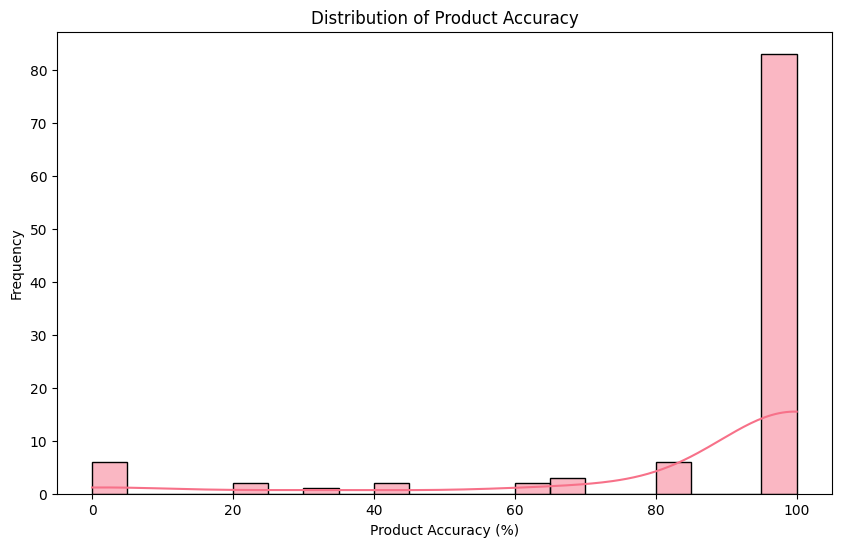

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Product_Accuracy'], bins=20, kde=True)
plt.title('Distribution of Product Accuracy')
plt.xlabel('Product Accuracy (%)')
plt.ylabel('Frequency')
plt.show()

### Identify Low Accuracy Cases

Define a threshold to categorize low accuracy cases.

In [9]:
low_accuracy_threshold = 80.0  # Define threshold for low accuracy
df['Accuracy_Level'] = np.where(df['Product_Accuracy'] < low_accuracy_threshold, 'Low Accuracy', 'High Accuracy')

# Counts
num_low_accuracy = df[df['Accuracy_Level'] == 'Low Accuracy'].shape[0]
total_cases = df.shape[0]
print(f"Number of low accuracy cases (< {low_accuracy_threshold}%): {num_low_accuracy}")
print(f"Total number of cases: {total_cases}")

Number of low accuracy cases (< 80.0%): 16
Total number of cases: 105


---

<a id="3"></a>

## 3. Analysis of Low Accuracy Cases

### Compare Distributions Between Low and High Accuracy Cases

#### Number of Filters

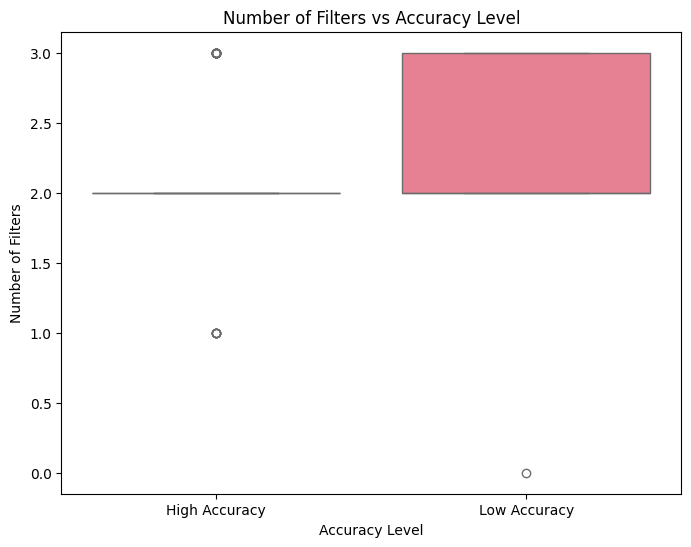

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Accuracy_Level', y='num_filters', data=df)
plt.title('Number of Filters vs Accuracy Level')
plt.xlabel('Accuracy Level')
plt.ylabel('Number of Filters')
plt.show()

#### Classification Confidence

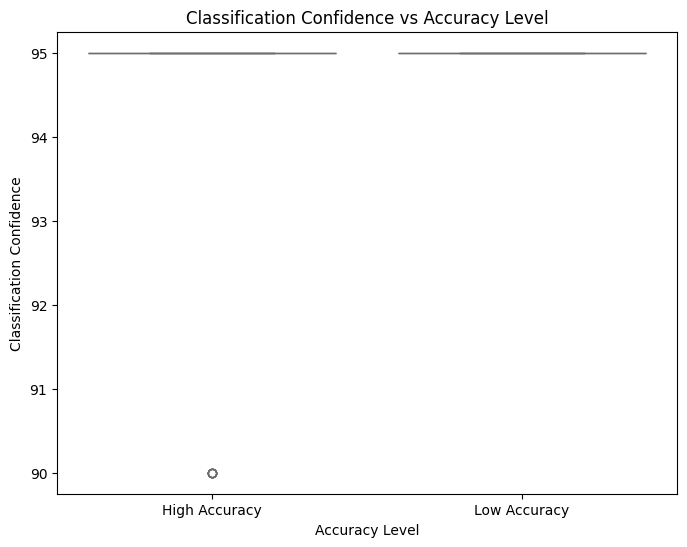

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Accuracy_Level', y='classification_confidence', data=df)
plt.title('Classification Confidence vs Accuracy Level')
plt.xlabel('Accuracy Level')
plt.ylabel('Classification Confidence')
plt.show()

#### Token Usage

Input Tokens:

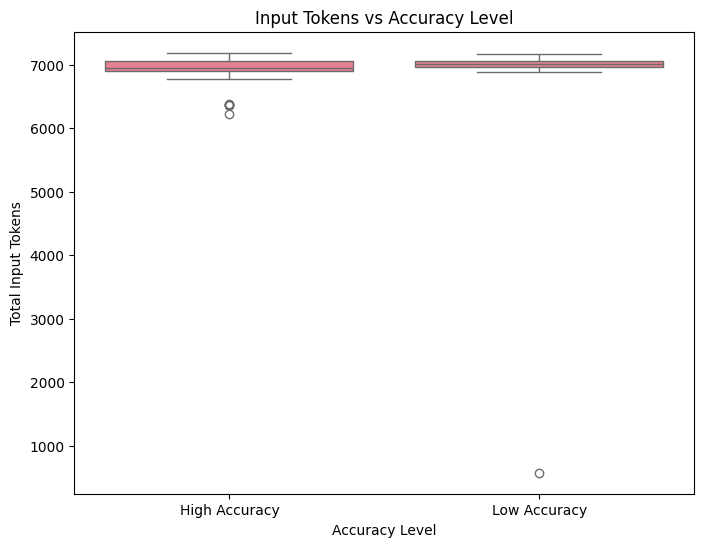

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Accuracy_Level', y='input_tokens_total', data=df)
plt.title('Input Tokens vs Accuracy Level')
plt.xlabel('Accuracy Level')
plt.ylabel('Total Input Tokens')
plt.show()

Output Tokens:

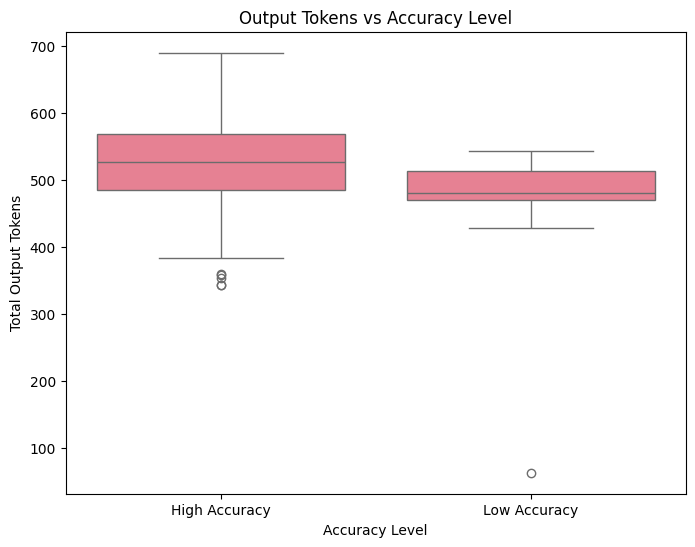

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Accuracy_Level', y='output_tokens_total', data=df)
plt.title('Output Tokens vs Accuracy Level')
plt.xlabel('Accuracy Level')
plt.ylabel('Total Output Tokens')
plt.show()

#### Response Time

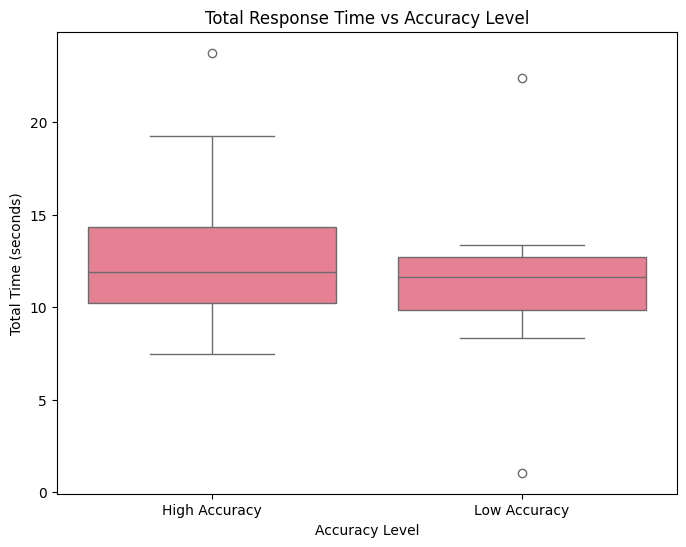

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Accuracy_Level', y='total_time', data=df)
plt.title('Total Response Time vs Accuracy Level')
plt.xlabel('Accuracy Level')
plt.ylabel('Total Time (seconds)')
plt.show()

### Correlation Analysis

Compute correlations between product accuracy and other variables.

In [15]:
variables_to_analyze = ['num_filters', 'input_tokens_total', 'output_tokens_total', 'total_time', 'classification_confidence']
correlations = df[['Product_Accuracy'] + variables_to_analyze].corr()
print("Correlation with Product Accuracy:")
print(correlations['Product_Accuracy'][variables_to_analyze])

Correlation with Product Accuracy:
num_filters                 -0.032923
input_tokens_total           0.254536
output_tokens_total          0.255242
total_time                   0.112294
classification_confidence   -0.106848
Name: Product_Accuracy, dtype: float64


#### Visualizing Correlations

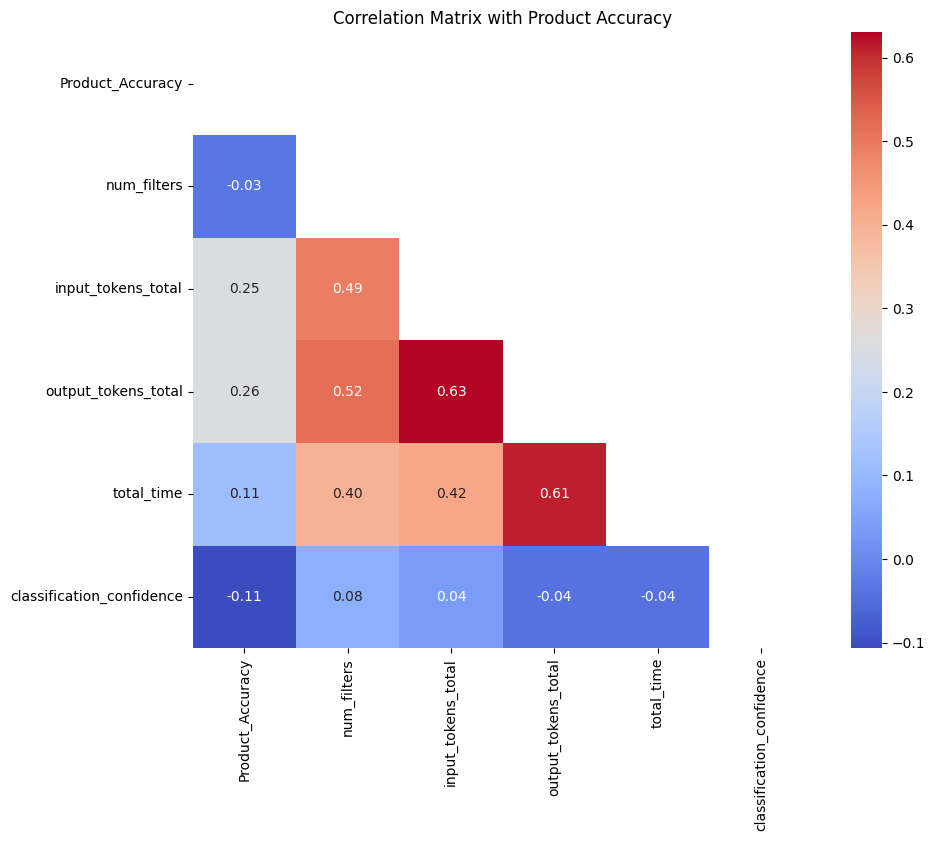

In [16]:
# Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Matrix with Product Accuracy")
plt.show()

### Scatter Plots

#### Product Accuracy vs Number of Filters

In [31]:
def plot_scatter(df, x_col, y_col, variations_only=True, title=None, x_label=None, y_label=None):
    # Filter data if needed
    plot_df = df[df["Is_Variation"] == True] if variations_only else df

    # Count occurrences of each x,y coordinate
    coord_counts = plot_df.groupby([x_col, y_col]).size().reset_index(name="count")

    # Create figure and plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        x=coord_counts[x_col],
        y=coord_counts[y_col],
        s=coord_counts["count"] * 100,  # Scale point size by count
        alpha=0.6,
        color="#2ecc71",
    )

    # Add count annotations on points
    for idx, row in coord_counts.iterrows():
        plt.annotate(
            str(int(row["count"])),
            (row[x_col], row[y_col]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=10,
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
        )

    # Add total count annotation
    n_points = len(plot_df)
    plt.text(
        0.95,
        0.05,
        f"n = {n_points}",
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
    )

    # Customize plot
    plt.title(title, pad=20, fontsize=14, fontweight="bold")
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add grid and customize appearance
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

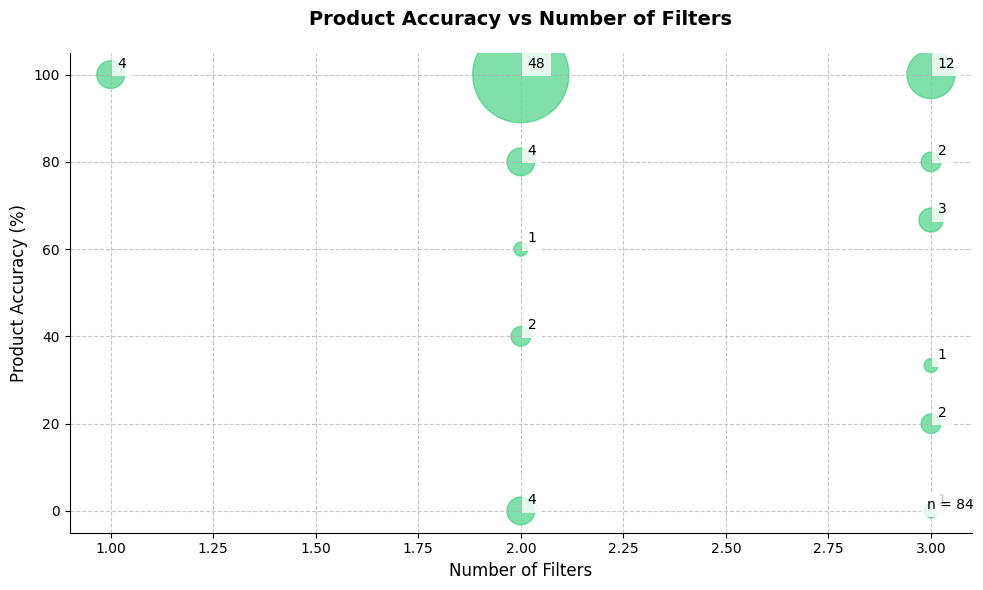

In [32]:
plot_scatter(
    df,
    "num_filters",
    "Product_Accuracy",
    variations_only=True,
    title="Product Accuracy vs Number of Filters",
    x_label="Number of Filters",
    y_label="Product Accuracy (%)",
)

#### Product Accuracy vs Classification Confidence

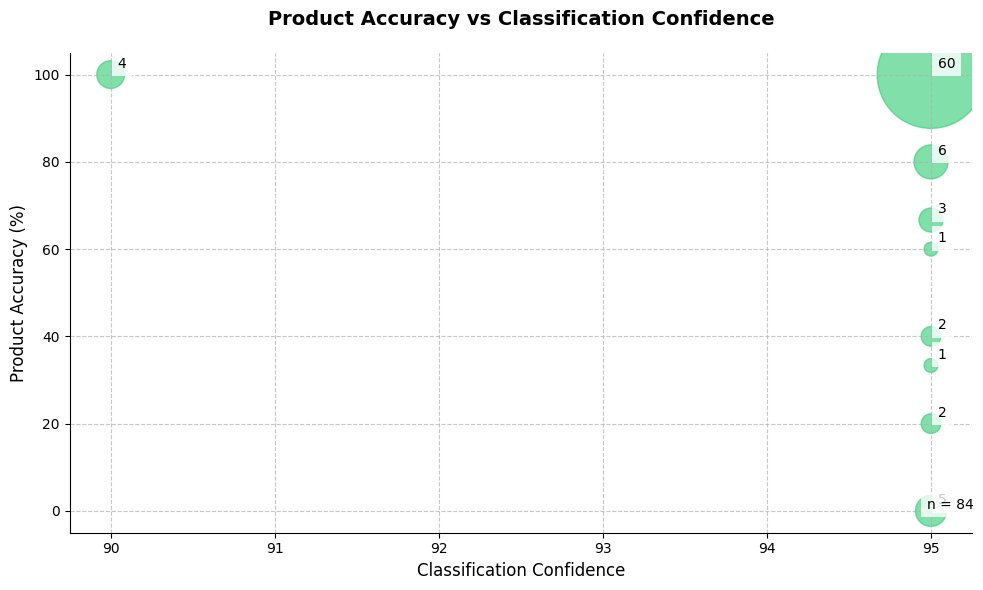

In [33]:
plot_scatter(
    df,
    "classification_confidence",
    "Product_Accuracy",
    variations_only=True,
    title="Product Accuracy vs Classification Confidence",
    x_label="Classification Confidence",
    y_label="Product Accuracy (%)",
)

#### Query Length vs Accuracy

Analyze whether the length of the query affects the product accuracy.

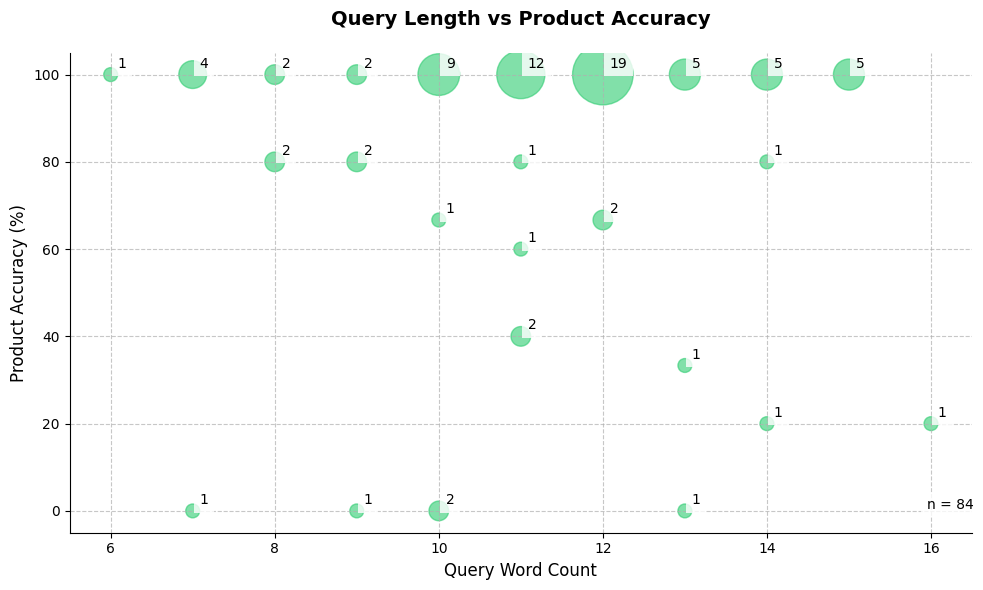

Correlation between Product Accuracy and Query Word Count: 0.05 (p-value: 6.31e-01)


In [34]:
# Create word count column
df['query_word_count'] = df['Input'].str.split().str.len()

# Scatter plot
plot_scatter(
    df,
    "query_word_count",
    "Product_Accuracy",
    variations_only=True,
    title="Query Length vs Product Accuracy",
    x_label="Query Word Count",
    y_label="Product Accuracy (%)",
)
# Correlation
corr_coef, p_value = pearsonr(df['Product_Accuracy'], df['query_word_count'])
print(f"Correlation between Product Accuracy and Query Word Count: {corr_coef:.2f} (p-value: {p_value:.2e})")

---

<a id="4"></a>

## 4. Analyzing the Impact of Filter Differences on Accuracy

### Compute Filter Differences

Assuming each prompt has variations, compute the difference in filters between the original prompt and its variations.

First, organize the data to group original prompts and their variations.

In [19]:
# Assuming each original prompt and its variations can be identified by 'Session ID' or a specific identifier in 'Message ID'
df["Is_Variation"] = df["Message ID"].str.contains("_variation")
df["Prompt_ID"] = df["Message ID"].str.extract(r"(^.*_response)").fillna(df["Message ID"])

df.head()

,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,...,time_generate,total_time,filters,num_filters,category,classification_confidence,Product_Accuracy,Accuracy_Level,Is_Variation,Prompt_ID
0,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,accuracy,gpt-4o,llm-router,2024-11-04 01:32:50,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Give me available devices manufactured by Adva...,...,14.038970,16.401381,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,90,100.0,High Accuracy,False,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response
1,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:04,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,List Advantech-made products with ETX form-factor,...,11.871414,14.304721,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,95,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response
2,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:16,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Show me ETX devices produced by Advantec,...,8.768579,11.395231,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,95,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response
3,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:26,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,What Advantech hardware comes in the ETX format?,...,6.663333,9.392540,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,vague_intent_product,90,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response
4,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:38,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Find Advantech-manufactured items with Embedde...,...,8.748690,11.486683,"{'manufacturer': 'ADVANTECH', 'formFactor': 'E...",2,clear_intent_product,90,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response


Compute filter differences.

In [20]:
def compute_filter_differences(group):
    """Compute filter differences between original prompt and its variations."""
    original_filters = group[group["Is_Variation"] == False]["filters"].iloc[0]
    variation_filters = group[group["Is_Variation"] == True]["filters"]

    filter_diffs = []
    for filters in variation_filters:
        # Compare filters by converting dict items to frozenset for hashability
        original_set = frozenset((k, str(v)) for k, v in original_filters.items())
        variation_set = frozenset((k, str(v)) for k, v in filters.items())

        # Compute symmetric difference
        diff = original_set.symmetric_difference(variation_set)
        diff_count = len(diff)
        filter_diffs.append(diff_count)

    return pd.Series(
        {
            "filter_diff_mean": np.mean(filter_diffs) if filter_diffs else 0,
            "filter_diff_max": np.max(filter_diffs) if filter_diffs else 0,
            "num_variations": len(variation_filters),
        }
    )


# Group by 'Prompt_ID'
grouped = df.groupby("Prompt_ID")

# Apply function to compute filter differences
filter_diff_metrics = grouped.apply(compute_filter_differences).reset_index()

# Merge back to df
df = df.merge(filter_diff_metrics, on="Prompt_ID", how="left")
df.head()

/var/folders/rp/6b0gnlkd7cl_wvl_lj9y8nx40000gn/T/ipykernel_69060/4251206964.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filter_diff_metrics = grouped.apply(compute_filter_differences).reset_index()


,Message ID,Test Type,Model,Architecture,Timestamp,Product Accuracy,Product Consistency,Order Consistency,Session ID,Input,...,num_filters,category,classification_confidence,Product_Accuracy,Accuracy_Level,Is_Variation,Prompt_ID,filter_diff_mean,filter_diff_max,num_variations
0,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,accuracy,gpt-4o,llm-router,2024-11-04 01:32:50,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Give me available devices manufactured by Adva...,...,2,clear_intent_product,90,100.0,High Accuracy,False,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,0.0,0.0,4.0
1,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:04,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,List Advantech-made products with ETX form-factor,...,2,clear_intent_product,95,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,0.0,0.0,4.0
2,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:16,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Show me ETX devices produced by Advantec,...,2,clear_intent_product,95,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,0.0,0.0,4.0
3,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:26,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,What Advantech hardware comes in the ETX format?,...,2,vague_intent_product,90,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,0.0,0.0,4.0
4,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response_...,accuracy,gpt-4o,llm-router,2024-11-04 01:33:38,100.00%,-,-,d0f4da9a-6730-4162-a0cd-78e1735b5566,Find Advantech-manufactured items with Embedde...,...,2,clear_intent_product,90,100.0,High Accuracy,True,74c3ab7c-188b-4b16-abaf-292437b9f6d7_response,0.0,0.0,4.0


### Analyze Correlation Between Filter Differences and Accuracy

#### Scatter Plot of Filter Differences vs Product Accuracy

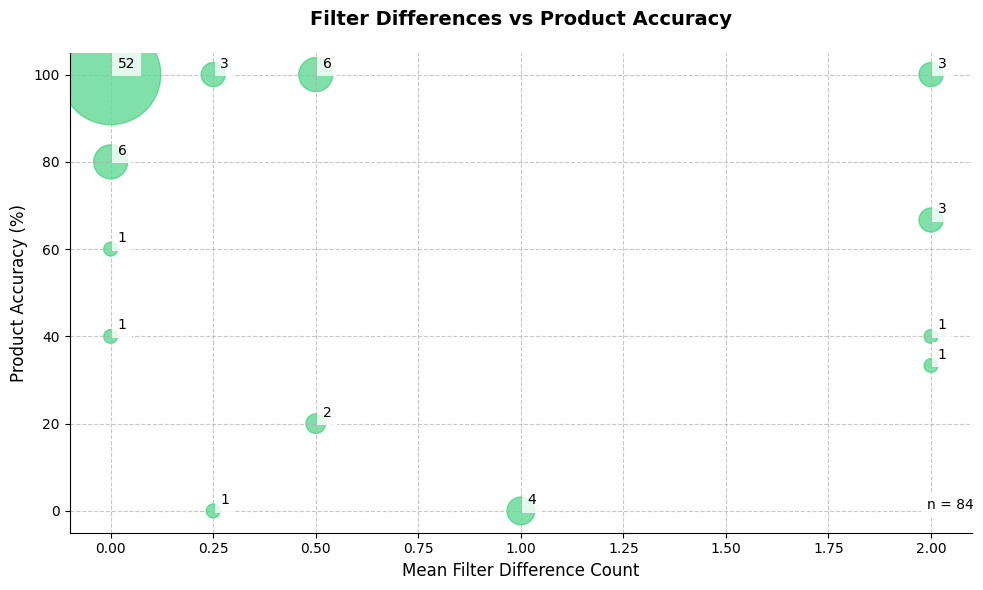

In [30]:
plot_scatter(
    df,
    "filter_diff_mean",
    "Product_Accuracy",
    variations_only=True,
    title="Filter Differences vs Product Accuracy",
    x_label="Mean Filter Difference Count",
    y_label="Product Accuracy (%)",
)

#### Correlation Analysis

In [35]:
corr_coef, p_value = pearsonr(df_variations['filter_diff_mean'], df_variations['Product_Accuracy'])
print(f"Correlation between Filter Differences and Product Accuracy: {corr_coef:.2f} (p-value: {p_value:.2e})")

Correlation between Filter Differences and Product Accuracy: -0.44 (p-value: 3.22e-05)


### Visualize Filter Differences for Individual Cases

Display cases where filter differences are significant.

In [23]:
def display_cases_with_filter_differences(df_variations, num_cases=5):
    significant_cases = df_variations[df_variations['filter_diff_mean'] > 0].sort_values('Product_Accuracy').head(num_cases)

    for idx, row in significant_cases.iterrows():
        print(f"Case Index: {idx}")
        print(f"Product Accuracy: {row['Product_Accuracy']}%")
        print(f"Filter Difference Count: {row['filter_diff_mean']}")
        print(f"Original Filters: {df[(df['Prompt_ID'] == row['Prompt_ID']) & (df['Is_Variation'] == False)]['filters'].iloc[0]}")
        print(f"Variation Filters: {row['filters']}")
        print(f"Input Query: {row['Input']}")
        print("-"*80)

# Display cases
display_cases_with_filter_differences(df_variations, num_cases=5)

Case Index: 51
Product Accuracy: 0.0%
Filter Difference Count: 0.25
Original Filters: {'processorCoreCount': '8-128', 'memory': 'ECC'}
Variation Filters: {'formFactor': 'BOX PC', 'processorCoreCount': '8-128', 'memory': 'ECC'}
Input Query: List industrial PCs with 8+ CPU cores that work with Error-Correcting Code memory.
--------------------------------------------------------------------------------
Case Index: 86
Product Accuracy: 0.0%
Filter Difference Count: 1.0
Original Filters: {'processorManufacturer': 'AMD'}
Variation Filters: {'processorManufacturer': 'AMD', 'ioCount': 'DISPLAY'}
Input Query: Show products with Display Port interface using AMD CPUs.
--------------------------------------------------------------------------------
Case Index: 87
Product Accuracy: 0.0%
Filter Difference Count: 1.0
Original Filters: {'processorManufacturer': 'AMD'}
Variation Filters: {'processorManufacturer': 'AMD', 'ioCount': 'DISPLAY'}
Input Query: List hardware featuring DisplayPort and AMD pro

---

<a id="5"></a>

## 5. Detailed Analysis of Low Accuracy Cases

### Display Low Accuracy Cases

Provide a more detailed analysis of low accuracy cases.

In [24]:
def display_low_accuracy_cases(df_low_accuracy, num_cases=5):
    for idx, row in df_low_accuracy.head(num_cases).iterrows():
        print(f"Case Index: {idx}")
        print(f"Product Accuracy: {row['Product_Accuracy']}%")
        print(f"Input Query: {row['Input']}")
        print(f"Extracted Filters: {row['filters']}")
        print(f"Number of Filters: {row['num_filters']}")
        print(f"Category: {row['category']}")
        print(f"Classification Confidence: {row['classification_confidence']}")
        print(f"Response: {row['Response']}")
        print(f"Reasoning: {row['Reasoning']}")
        print("-"*80)

# Display the low accuracy cases
df_low_accuracy = df[df['Accuracy_Level'] == 'Low Accuracy'].sort_values('Product_Accuracy')
display_low_accuracy_cases(df_low_accuracy, num_cases=10)

Case Index: 51
Product Accuracy: 0.0%
Input Query: List industrial PCs with 8+ CPU cores that work with Error-Correcting Code memory.
Extracted Filters: {'formFactor': 'BOX PC', 'processorCoreCount': '8-128', 'memory': 'ECC'}
Number of Filters: 3
Category: clear_intent_product
Classification Confidence: 95
Response: It looks like we're on the hunt for industrial PCs that pack a punch with at least 8 processor cores and support for ECC memory. While the search results didn't yield a perfect match for all criteria, let's explore what we have. The AMIAF Fanless Box System (AMI220EF) stands out with its impressive 24-core processor, making it a powerhouse for industrial applications. Although the memory specifics aren't fully detailed, it offers robust performance with its 8th Gen Intel Core i3 processors. The other options, like the UBXD and BL BPC EW Box PC, offer solid features but don't quite meet the core count requirement. If you're open to exploring systems with slightly different s

### Analyze Patterns in Low Accuracy Cases

Upon examining the low accuracy cases, consider the following:

- **Filter Extraction Issues:** Are the extracted filters incomplete or incorrect?
- **Classification Errors:** Is the category misclassified?
- **Low Classification Confidence:** Is the confidence level lower than in high accuracy cases?
- **Query Complexity:** Do the queries contain ambiguities, typos, or complex structures?
- **Response Relevance:** Is the response off-topic or missing key information?
- **Token Usage and Response Time:** Are these significantly different from high accuracy cases?

---

<a id="6"></a>

## 6. Potential Areas for Improvement

Based on the analysis:

- Improve the algorithm to handle query variations and extract accurate filters.
- Implement robust parsing to handle typos and rephrased queries.
- Optimize LLM token usage for better accuracy and efficiency.
- Enhance product feature extraction pipeline to improve filter quality.


<a id="7"></a>

## 7. Conclusion

**Findings:**

- There is a noticeable correlation between filter differences and product accuracy.
- There is a significant correlation between token usage and product accuracy.